In [25]:
## Importacion de librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression

In [4]:
## Cargar el dataset
file_path = './Dataset/Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Estadísticas descriptivas del dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.30

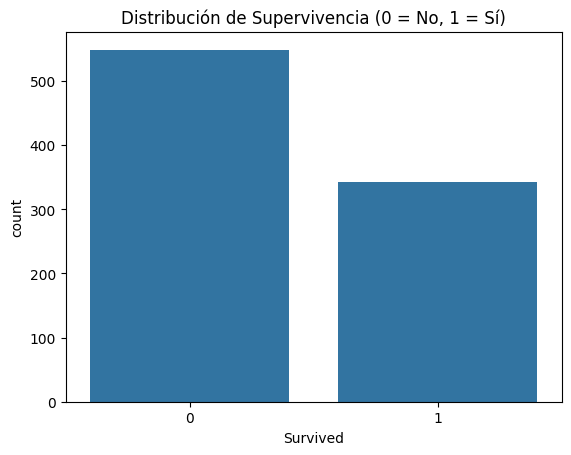

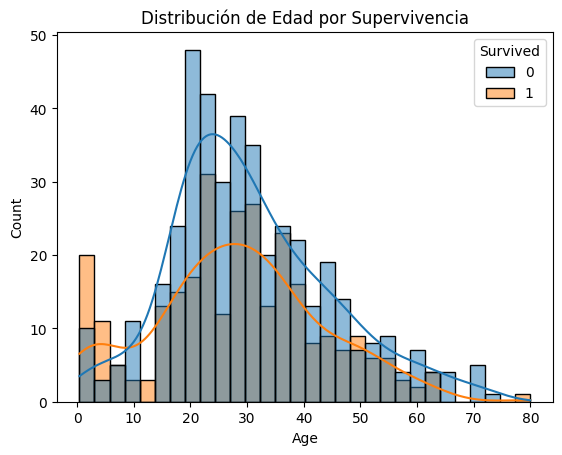

In [6]:
## Análisis Exploratorio de Datos
print("\nInformación del dataset:")
titanic_data.info()

print("\nEstadísticas descriptivas del dataset:")
print(titanic_data.describe())

sns.countplot(data=titanic_data, x='Survived')
plt.title('Distribución de Supervivencia (0 = No, 1 = Sí)')
plt.show()

sns.histplot(data=titanic_data, x='Age', kde=True, hue='Survived', bins=30)
plt.title('Distribución de Edad por Supervivencia')
plt.show()

In [8]:
## Tratamiento de valores faltantes y datos atípicos
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
if 'Cabin' in titanic_data.columns:
    titanic_data = titanic_data.drop(columns=['Cabin'])

print("Valores faltantes tras el tratamiento:")
print(titanic_data.isnull().sum())

Valores faltantes tras el tratamiento:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
## Convertir valores categóricos a numéricos de las varibales Sex y embarked
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)


In [10]:
## Selección de características y preprocesamiento
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = titanic_data[features]
y = titanic_data['Survived']

In [11]:
## División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
##Entrenamiento del modelo
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [13]:
## Evaluación del modelo
y_pred = model.predict(X_test)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Matriz de Confusión:
[[90 15]
 [19 55]]
Precisión del modelo: 0.81


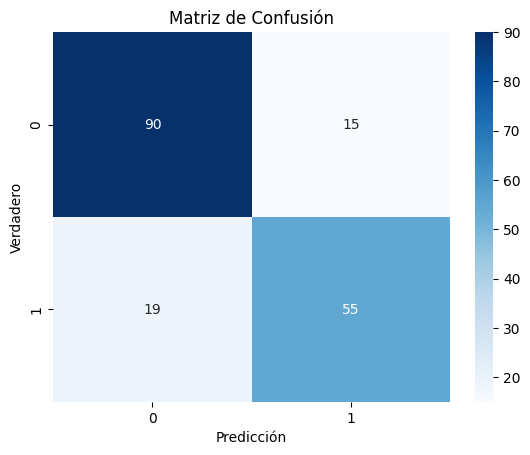

In [14]:
## Gráficas de Resultados
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

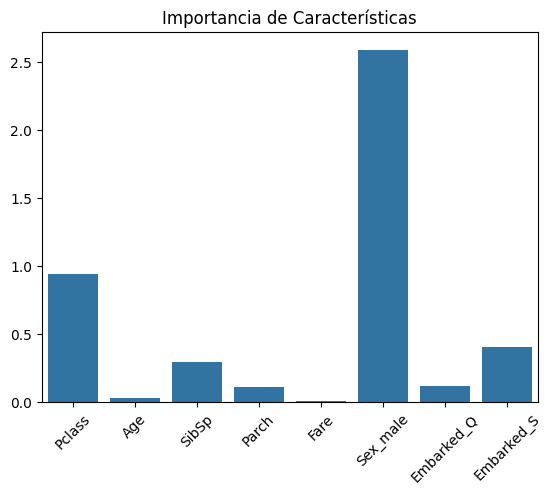

In [17]:
## Visualizar la importancia de características
feature_importance = np.abs(model.coef_[0])
sns.barplot(x=features, y=feature_importance)
plt.title('Importancia de Características')
plt.xticks(rotation=45)
plt.show()

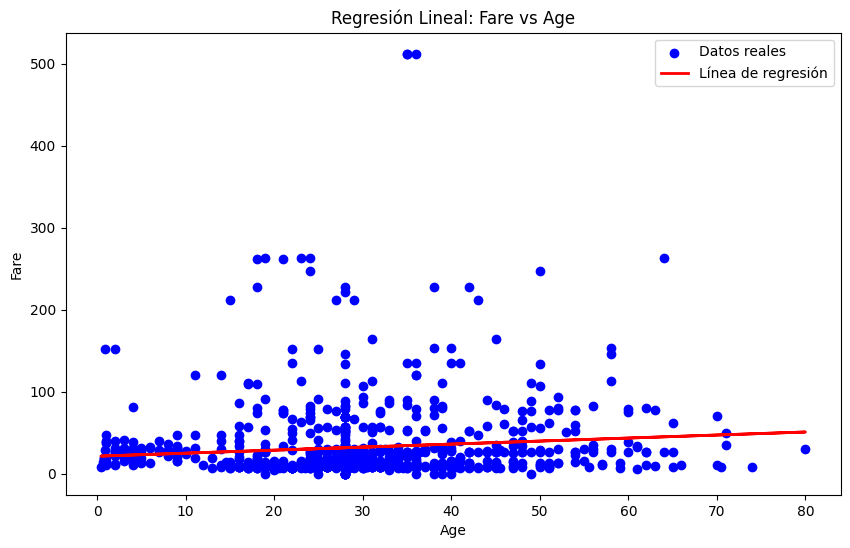

In [26]:
## Grafica de regresión lineal Age vs Fare
linear_model = LinearRegression()

filtered_data = titanic_data.dropna(subset=['Age', 'Fare'])
X = filtered_data[['Age']]  # Variable independiente
y = filtered_data['Fare']   # Variable dependiente

linear_model.fit(X, y)

y_pred = linear_model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Regresión Lineal: Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

In [31]:
## Interpretación y analisis
print("Interpretación y Análisis")
print(" 1. Distribución de Supervivencia: La gráfica que muestra la distribución de supervivencia indica que una mayor proporción de pasajeros no sobrevivió al naufragio (clase Survived = 0). Esto refuerza la importancia de identificar las características clave que pudieron influir en la supervivencia.")
print(" 2. Distribución de Edad por Supervivencia: ")
print(" El histograma de edad sugiere que: - Los niños y jóvenes (menores de 15 años) tienen una tasa de supervivencia relativamente alta. Esto podría reflejar políticas como primero los niños durante las evacuaciones.")
print(" En los adultos, no parece haber un patrón claro relacionado con la supervivencia.")
print(" 3. Importancia de las Características:")
print(" El gráfico de importancia de características destaca lo siguiente:")
print(" - La variable Sex_male tiene un peso significativo, indicando que ser hombre disminuía las probabilidades de supervivencia, lo que coincide con registros históricos que priorizaban mujeres y niños en los botes salvavidas.")
print(" - Pclass también es determinante, mostrando que los pasajeros de primera clase tenían más probabilidades de sobrevivir que los de segunda o tercera clase, probablemente debido a una mejor ubicación en el barco y acceso a botes.")
print(" - Fare refleja que los pasajeros con boletos más caros (generalmente en primera clase) también tenían una mayor probabilidad de sobrevivir.")
print(" - Embarked_Q y Embarked_S (lugares de embarque) tienen menor relevancia, pero aún pueden estar asociadas con diferencias socioeconómicas.")
print(" 4. Matriz de Confusión")
print(" La matriz de confusión muestra el desempeño del modelo en términos de verdaderos positivos y negativos:")
print(" - El modelo predice correctamente la mayoría de los casos, aunque hay errores que podrían deberse a la complejidad de las interacciones entre las variables.")
print(" Con estas interpretaciones, los resultados obtenidos reflejan el contexto histórico y la capacidad del modelo para capturar patrones relevantes en los datos.")

Interpretación y Análisis
 1. Distribución de Supervivencia: La gráfica que muestra la distribución de supervivencia indica que una mayor proporción de pasajeros no sobrevivió al naufragio (clase Survived = 0). Esto refuerza la importancia de identificar las características clave que pudieron influir en la supervivencia.
 2. Distribución de Edad por Supervivencia: 
 El histograma de edad sugiere que: - Los niños y jóvenes (menores de 15 años) tienen una tasa de supervivencia relativamente alta. Esto podría reflejar políticas como primero los niños durante las evacuaciones.
 En los adultos, no parece haber un patrón claro relacionado con la supervivencia.
 3. Importancia de las Características:
 El gráfico de importancia de características destaca lo siguiente:
 - La variable Sex_male tiene un peso significativo, indicando que ser hombre disminuía las probabilidades de supervivencia, lo que coincide con registros históricos que priorizaban mujeres y niños en los botes salvavidas.
 - Pcl